<a href="https://colab.research.google.com/github/wdgstl/assignment2/blob/main/WDG_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The abstract emphasizes how one of the most difficult parts of conducting data analysis and model development is cleaning the data. Not only is this process extremely time consuming, but there is little research to suggest ways to improve the process. This paper breaks down data cleaning and approaches it from the angle of "data tidying," which refers to datasets that are structured so that each variable is a column, each observation a row, and each type of unit is a table. This consistency makes it much easier to visualize, analyze, and manipulate the data, expediating the overall model development process.

2. The goal of the "tidy data standard" is to provide a universal way of structuring and organizing data so various tools can be used to conduct cleaning and analysis without needing to translate the data.

3. : "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." --> This means that tidy datasets are consistent and follow a similar pattern, while messy datasets are all unique and contain different inconsistencies.
"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." --> When looking at a specific dataset, the context provided oftentimes makes it fairly easy to point out observations from variables. However, in general it is more difficult because certain variables can mean many different things in different context. This is why domain knowledge and expertise is so important when conducting data analysis.

4. Values --> numbers (if quantiative), or strings (if qualitative). Belong to a variablke and an observation. Variables --> contains all values that measure same attribute. Observations --> contains all values measured on the same unit (person, day, ect..) across attributes

5. "Tidy Data" maps the meaning of a dataset to its structure using 3 criteria:

- Each variable forms a column
- Each observations forms a row.
- Each type of observation unit forms a table

  It is well suited for vectorised programming (R). It is also easier for an analyst or computer to extract variables since tidy data is standardized. It is also easier to scan the raw values.

6. 5 most common problems:
- column headers are values, not variable names
- multiple variables stored in one column
- variables stored in both columns and rows
- multiple types of observational units are stored in same table
- single observational unit is stored in multiple tables

  The data in Table 4 are messy because currently, each variable does not form a column, the data is not separated out into observations that form rows, and each type of observation unit does not form its own table of values.

  "Melting" a dataset refers to turning the columns into rows. In melting, the list of columns that already have variables are called colvars. The other columns in the dataset are converted into a variable called column, and a variables called value. The result of this process is a "molten" dataset.



7. Table 11 is messy because variables are stored in both rows and in columns. Specifically, variables are in individual columns and across rows. There is also an issue with the format of months since months with fewer than 31 days have structural missing values for the last day(s) of the month. Additionally, the element columnn is not a variable, but it rather stores the names of variable.

  Table 12 is a tidy and molten version of Table 11 because the colvars id, year, month and the column with the variable names, elements, are melted. The missing values are also dropped from the dataset. Then, the column with sex and age is split into two new columns. Finally, there is a tidy dataset where there is one variable per column, each row is an observation, and each observation unit forms a table.


8. The chicken-and-egg problem says that tidy tools are linked to tidy data if tidy data is only as useful as the tools that work with it. This establishes the necessary coexistence between tidy data and its tools. More specifically, tidy data relies on tidy tools, but tidy tools also expect tidy data. The "problem" here is whether or not tidy tools should first be made, and then the tidy data should be made to work with these tools, or if the tidy tools should be made to fit the data. This gets into what Wickham wants to happen in the future. He hopes that the tidy data framework is continously improved and build upon. He also wants tidy data to use ideas from a more diverse spread of disciplines, so it can explore different data formats.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

Axes(0.125,0.11;0.775x0.77)
Total Missing:  0


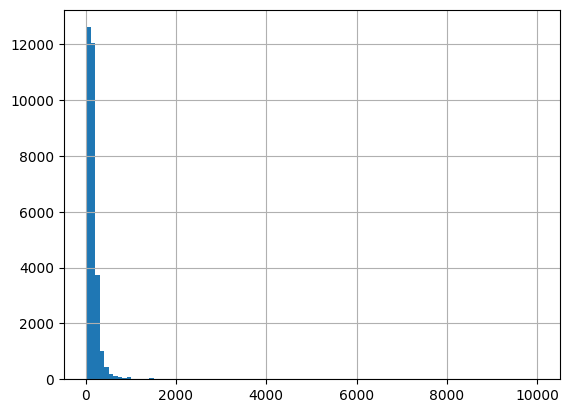

In [5]:
import pandas as pd

#Question 1 - Cleaning Price Variable in airbnb_hw.csv

airbnb_df = pd.read_csv("/content/airbnb_hw.csv")

#print(airbnb_df.info())

#print(airbnb_df.head(10))

#CLEANING: remove the commas from the prices and also make them integers
airbnb_df['Price'] = airbnb_df['Price'].str.replace(',', '')

# print(airbnb_df['Price'].unique())

# print(airbnb_df['Price'].value_counts())

#COERCION: coerce to numeric

airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'])

print(airbnb_df['Price'].hist(bins = 100))

#IMPUTATION:

airbnb_df['Price' + '_nan'] = airbnb_df['Price'].isnull()


print("Total Missing: ", sum(airbnb_df['Price_nan']))

#Summary of Choices: First, I visualized the data and noticed that numbers above 999 were separated by commas. To fix this, I removed the ',' and also coerced the values to numeric. I then checked to see how many null/na values there were (there were none), so no imputation was needed.


In [10]:
import numpy as np
#Question 2 - Cleaning Type Variable in sharks.csv

sharks_df = pd.read_csv('/content/sharks.csv')

# print(sharks_df.info())
# print(sharks_df.head(10))

print(sharks_df['Type'].nunique())

print(sharks_df['Type'].unique())

sharks_df['Type'] = sharks_df['Type'].replace('nan', np.nan)

sharks_df['Type' + '_nan'] = sharks_df['Type'].isnull()


print("Total Missing: ", sum(sharks_df['Type_nan']))

print(sharks_df[sharks_df['Type_nan'] == True])

sharks_df = sharks_df.dropna(subset = ['Type'])

print(sharks_df['Type'].unique())


#Summary of Choices: I first looked at the categories in the Type variable, and saw that there was a category called "nan." To further investigate, I checked to see how many values were nan, and found that there were 5. After looking at the full observations, I decided it would make the most sense to drop these from the dataset since most of these observations also had other missing fields and since the dataset is so large, it is unlikely this decision would lead to losing contextual importance.

12
['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg']
Total Missing:  5
      index   Case Number                  Date    Year Type    Country  \
239     239  2017.09.15.a           15-Sep-2017  2017.0  NaN      SAMOA   
537     537    2015.07.27           27-Jul-2015  2015.0  NaN  AUSTRALIA   
4087   4087           NaN                   NaN     NaN  NaN        NaN   
5025   5025  1936.09.11.R  Reported 11-Sep-1936  1936.0  NaN    VIETNAM   
5864   5864  1890.03.03.R  Reported 03-Mar-1890  1890.0  NaN     CEYLON   

              Area          Location           Activity           Name  ...  \
239   Upolu Island         Nofoali’i            Fishing           male  ...   
537       Victoria  Tyrendarra Beach            Surfing           male  ...   
4087           NaN               NaN                NaN            NaN  ...   
5025           NaN            Saigon  Wreck of a sa

<ipython-input-10-19804bcf5db0>:4: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks_df = pd.read_csv('/content/sharks.csv')


In [66]:
pretrial_df = pd.read_csv('/content/VirginiaPretrialData2017.csv')

<ipython-input-66-e569a0dd22f5>:1: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,

In [117]:
#Question 3 - Cleaning WhetherDefendantWasReleasedPretrial Variable in pretrial data

pretrial_df['WhetherDefendantWasReleasedPretrial' + '_nan'] = pretrial_df['WhetherDefendantWasReleasedPretrial'].isnull()


print("Total Missing: ", sum(pretrial_df['WhetherDefendantWasReleasedPretrial_nan']))

print(pretrial_df['WhetherDefendantWasReleasedPretrial'].unique())

print(pretrial_df['WhetherDefendantWasReleasedPretrial'].value_counts())

print(pretrial_df['WhetherDefendantWasReleasedPretrial'].value_counts())



Total Missing:  0
[9 0 1]
1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64
1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


In [82]:
#Question 4 - Cleaning ImposedSentenceAllChargeInContactEvent Variable in pretrial data

pretrial_df['ImposedSentenceAllChargeInContactEvent'] = pretrial_df['ImposedSentenceAllChargeInContactEvent'].replace(' ', '0')
pretrial_df['ImposedSentenceAllChargeInContactEvent'] = pretrial_df['ImposedSentenceAllChargeInContactEvent'].astype(float)

#print(pretrial_df['ImposedSentenceAllChargeInContactEvent'].unique())

#print(pd.crosstab(pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'],pretrial_df['ImposedSentenceAllChargeInContactEvent'] ))


pretrial_df.loc[ pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0, 'ImposedSentenceAllChargeInContactEvent'] = 0

pretrial_df.loc[ pretrial_df['ImposedSentenceAllChargeInContactEvent'].astype(int) < 12, 'SentenceTypeAllChargesAtConvictionInContactEvent'] = 1

pretrial_df.loc[ pretrial_df['ImposedSentenceAllChargeInContactEvent'].astype(int) >= 12, 'SentenceTypeAllChargesAtConvictionInContactEvent'] = 2

pretrial_df.loc[ pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 'ImposedSentenceAllChargeInContactEvent'] = 0

pretrial_df.loc[ pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, 'ImposedSentenceAllChargeInContactEvent'] = 0

print(pretrial_df.loc[ pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 'ImposedSentenceAllChargeInContactEvent'].value_counts())


#print(pretrial_df['ImposedSentenceAllChargeInContactEvent'].isna().sum())

# print(pretrial_df['ImposedSentenceAllChargeInContactEvent'].unique())

#Summary of Choices: I found that there were inconsistencies in the data. Specifically, some values in SentenceType 1 and SentenceType 2 did not actually belong there according to the codebook. To fix this, I swapped them to their correct column label.

Series([], Name: ImposedSentenceAllChargeInContactEvent, dtype: int64)


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [ ]:
#Question 2:

print(airbnb_df.info())
print(airbnb_df.head(10))

#Dimensions: 30478 rows x 14 columns
#Observations: 30478
#Variables: (listed below)

In [ ]:
#Question 3

print(pd.crosstab(airbnb_df['Room Type'], airbnb_df['Property Type']))

#Patterns: Apartments tend to mostly be Entire home/apt or private room. Bungalows are always Entire home/apt in this dataset. Houses are mostly private room.
# In general, private rooms are more common than renting the entire property in Bed & Breakfast, Houses, Huts, Dorms, Castles, Chalets, Tents, and Other.

<Axes: ylabel='Density'>

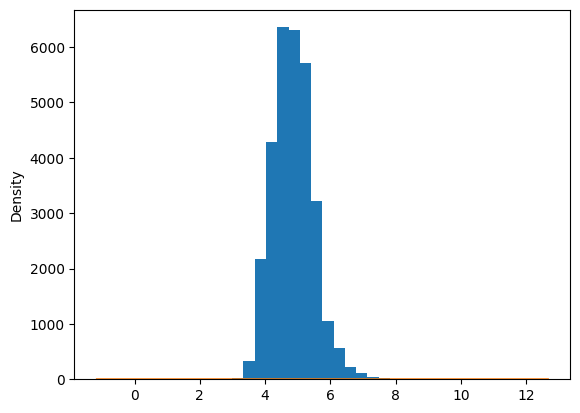

In [108]:
#Question 4
#print(airbnb_df['Price'].hist(bins = 50))

airbnb_df['Price_log'] = np.log(airbnb_df['Price'])
airbnb_df.loc[airbnb_df['Price_log']>0,'Price_log'].hist(bins=20,grid=False)

<Axes: ylabel='Density'>

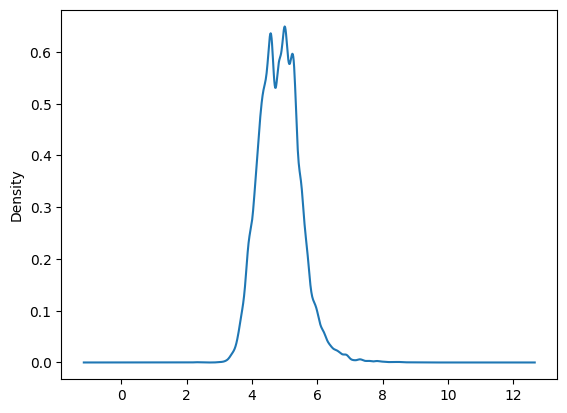

In [109]:
airbnb_df['Price_log'].plot.density()

<Axes: >

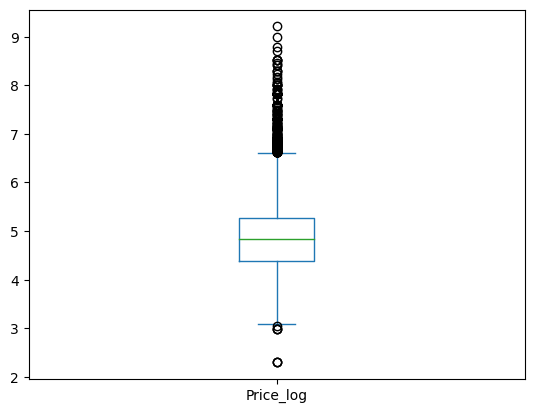

In [110]:
airbnb_df['Price_log'].plot.box()

In [118]:
airbnb_df['Price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

In [ ]:
#the data appears to be normally distributed and unimodal, which makes it a good response variable if we are studying how other variables affect it. The plots were not nearly as informative when looking at Price, but after applying a log() transformation the data looked better. The box plot indicates the presence of a lot of outliers (more high outliers than low).

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

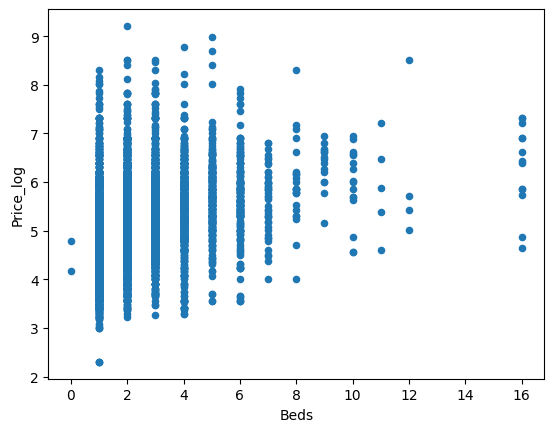

In [122]:
#Question 5

#
airbnb_df.plot.scatter(y = 'Price_log', x = 'Beds')

#there is a clear fanning in pattern.

airbnb_df.loc[:,['Beds','Price']].groupby('Beds').describe()

#the average price seems to increase with the number of beds, and the standard deviatio also seems to increase up to 6 beds, then the trend is more variable


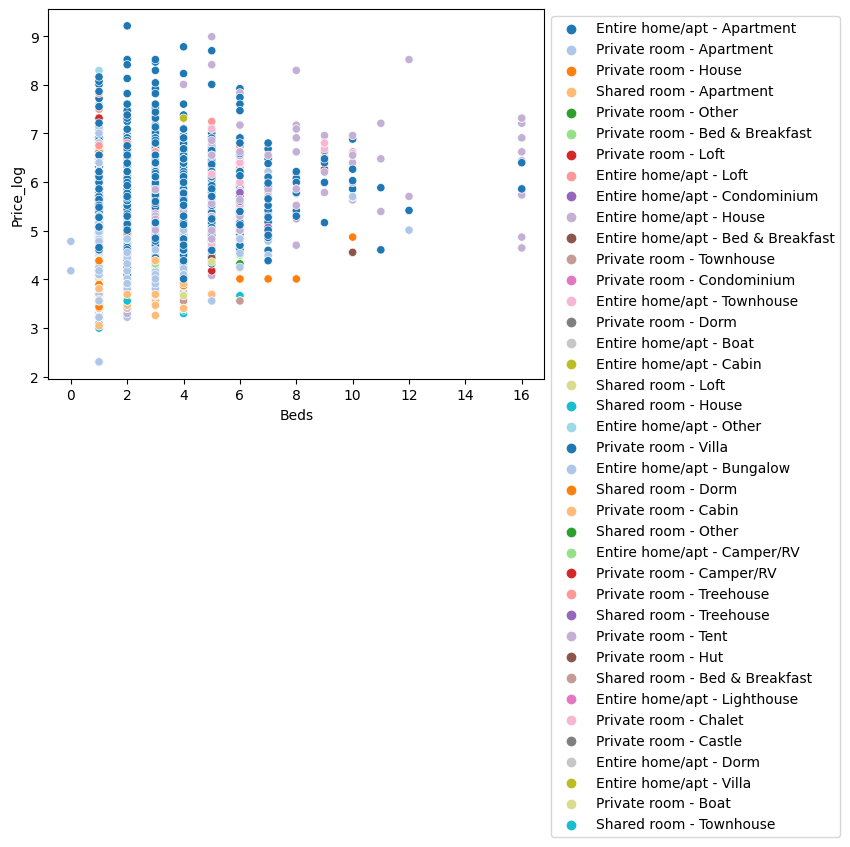

In [121]:
#Question 6
import seaborn as sns
import matplotlib.pyplot as plt

airbnb_df['Room_Property_Type'] = airbnb_df['Room Type'] + ' - ' + airbnb_df['Property Type']

sns.scatterplot(data=airbnb_df, x='Beds', y='Price_log', hue='Room_Property_Type', palette='tab20')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

#It seems like the highestg points (highest price) belong to entire home/apt - House.


In [124]:
airbnb_df.loc[:,['Room_Property_Type','Price']].groupby('Room_Property_Type').describe()
#The highest price seems to be Entire home/apt - Villa and Entire home/apt - Other. The highest standard deviations are Private Room - Other, Entire home/apt - Villa, Entire home/apt - Townhouse, Entire home/apt - Villa - Other, Entire home/apt - Loft, Entire home/apt - Condo. The mean seems to be a better measure because the data is slightly right skewed.


Price                                  \
                                     count        mean          std    min   
Room_Property_Type                                                           
Entire home/apt - Apartment        15669.0  213.224839   218.097834   10.0   
Entire home/apt - Bed & Breakfast     13.0  184.538462   119.814172   85.0   
Entire home/apt - Boat                 7.0  158.428571    51.110524  100.0   
Entire home/apt - Bungalow             4.0  150.750000    46.464144   87.0   
Entire home/apt - Cabin                1.0  250.000000          NaN  250.0   
Entire home/apt - Camper/RV            6.0  114.333333   107.685963   45.0   
Entire home/apt - Condominium         72.0  304.861111   266.197497   80.0   
Entire home/apt - Dorm                 4.0   44.250000    24.060687   30.0   
Entire home/apt - House              752.0  297.263298   468.409428   27.0   
Entire home/apt - Lighthouse           1.0   39.000000          NaN   39.0   
Entire home/apt - Loft               392.0  330.510204   321.519721   55.0   
Entire home/apt - Other               14.0  843.428571  1133.062271   66.0   
Entire home/apt - Townhouse           83.0  280.783133   314.605252   66.0   
Entire home/apt - Villa                4.0  529.750000   650.963581  120.0   
Private room - Apartment           10748.0   92.713900    65.237050   10.0   
Private room - Bed & Breakfast       155.0   97.161290    47.031971   32.0   
Private room - Boat                    1.0  120.000000          NaN  120.0   
Private room - Cabin                   1.0   80.000000          NaN   80.0   
Private room - Camper/RV               1.0   39.000000          NaN   39.0   
Private room - Castle                  1.0  150.000000          NaN  150.0   
Private room - Chalet                  1.0   99.000000          NaN   99.0   
Private room - Condominium            22.0   98.590909    40.576394   46.0   
Private room - Dorm                   16.0   86.562500    40.738137   50.0   
Private room - House                1258.0   77.750397    49.402650   25.0   
Private room - Hut                     2.0   75.000000    35.355339   50.0   
Private room - Loft                  312.0  108.057692   128.817912   39.0   
Private room - Other                  29.0  211.931034   235.404505   39.0   
Private room - Tent                    4.0  126.250000    94.989034   40.0   
Private room - Townhouse              52.0   83.365385    30.578109   45.0   
Private room - Treehouse               1.0   95.000000          NaN   95.0   
Private room - Villa                   4.0  126.250000    71.107313   60.0   
Shared room - Apartment              685.0   79.200000    67.720849   20.0   
Shared room - Bed & Breakfast         12.0  143.666667   245.328104   30.0   
Shared room - Dorm                    11.0   73.181818    46.328864   30.0   
Shared room - House                   80.0   77.487500   275.409936   10.0   
Shared room - Loft                    49.0   78.816327    87.521824   30.0   
Shared room - Other                    4.0  148.750000   134.806961   70.0   
Shared room - Townhouse                1.0   95.000000          NaN   95.0   
Shared room - Treehouse                3.0  167.666667   114.788211   95.0   

                                                                    
                                      25%    50%      75%      max  
Room_Property_Type                                                  
Entire home/apt - Apartment        135.00  175.0   235.00  10000.0  
Entire home/apt - Bed & Breakfast  121.00  130.0   220.00    525.0  
Entire home/apt - Boat             122.50  150.0   182.00    250.0  
Entire home/apt - Bungalow         133.50  160.5   177.75    195.0  
Entire home/apt - Cabin            250.00  250.0   250.00    250.0  
Entire home/apt - Camper/RV         49.00   74.0   114.00    325.0  
Entire home/apt - Condominium      155.00  200.0   375.00   1990.0  
Entire home/apt - Dorm              30.00   33.5    47.75     80.0  
E

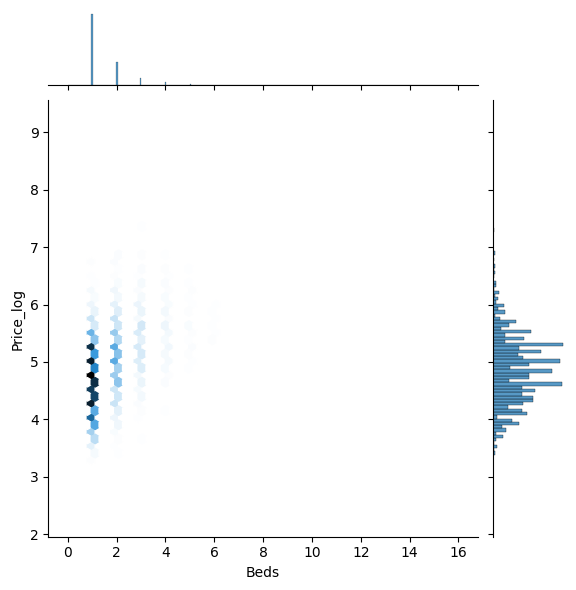

In [125]:
#Question 7

sns.jointplot(data=airbnb_df, x='Beds', y='Price_log', kind = 'hex')
plt.show()

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.